In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt

In [3]:
!git clone https://github.com/zaza-ipynb/Data-Mining-Cup-2019.git
!unzip -o Data-Mining-Cup-2019/dmc.zip

Cloning into 'Data-Mining-Cup-2019'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 7), reused 13 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 13.76 MiB | 1.42 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Archive:  Data-Mining-Cup-2019/dmc.zip
  inflating: DMC_2019_task/DATA-MINING-CUP-2019-features.pdf  
  inflating: DMC_2019_task/DATA-MINING-CUP-2019-task.pdf  
  inflating: DMC_2019_task/test.csv  
  inflating: DMC_2019_task/train.csv  


In [2]:
df = pd.read_csv('DMC_2019_task/train.csv', sep='|')
pred = pd.read_csv('DMC_2019_task/test.csv', sep='|')
real = pd.read_csv('Data-Mining-Cup-2019/DMC-2019-realclass.csv', sep='|')

# Data Overview

In [3]:
df.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [4]:
pred.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [5]:
real.head()

,fraud
0,0
1,0
2,0
3,0
4,0


### Class Distribution and analisis of data characteristics

In [6]:
print('fraud :',(df['fraud'] == 1).sum())
print('not fraud :',(df['fraud'] == 0).sum())
print('percentage fraudulent :', len(df[df.fraud ==1])/len(df)*100, '%')
print('percentage non-fraudulent :', len(df[df.fraud ==0])/len(df)*100, '%')

fraud : 104
not fraud : 1775
percentage fraudulent : 5.534858967535923 %
percentage non-fraudulent : 94.46514103246408 %


/tmp/ipykernel_3403/1375687245.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts = [df[df.fraud == 0].count()[0], df[df.fraud == 1].count()[0]]
/tmp/ipykernel_3403/1375687245.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  counts = [df[df.fraud == 0].count()[0], df[df.fraud == 1].count()[0]]


<Axes: title={'center': 'Distribution of classes'}>

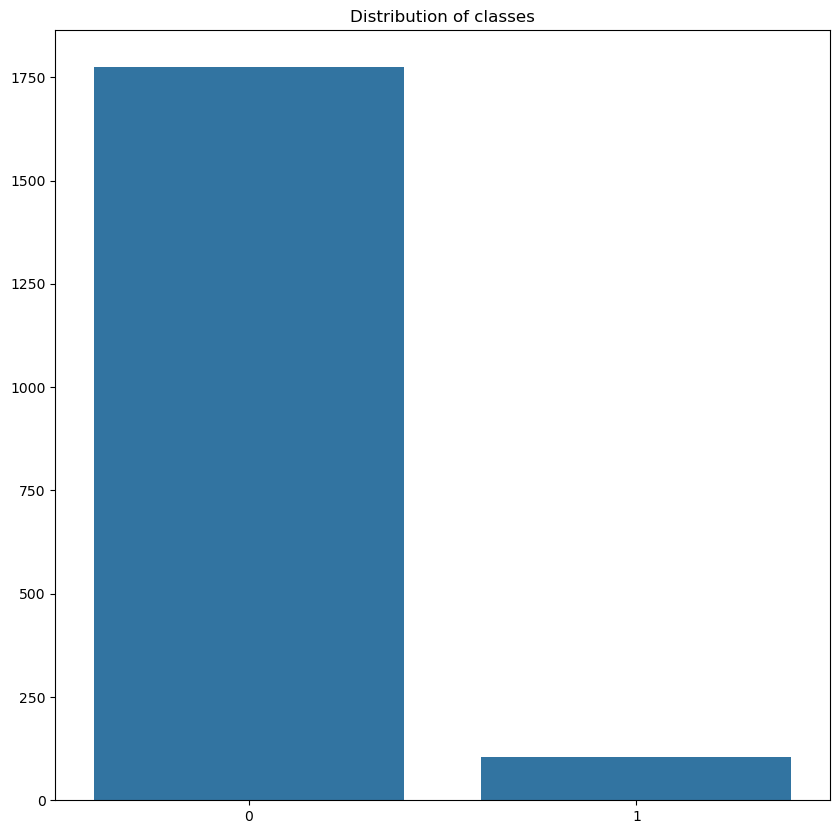

In [7]:
counts = [df[df.fraud == 0].count()[0], df[df.fraud == 1].count()[0]]
plt.figure(figsize=(10,10))
plt.title("Distribution of classes")
sns.barplot(x=[0,1], y=counts)